#### Name :- Abhishek Ajay Avati
#### Rollno:-33106
#### Batch :-M-9
#### PS :- The counsellor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counsellor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not.

1.Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.
2.Perform data-preparation (Train-Test Split)
3.Apply Machine Learning Algorithm
4.Evaluate Model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [2]:
data=pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
data.shape

(400, 9)

In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
data["Chance of Admit "]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [7]:
data.loc[data["Chance of Admit "]<0.8,"Chance of Admit "]=0
data.loc[data["Chance of Admit "]>=0.8,"Chance of Admit "]=1

In [8]:
data["Chance of Admit "]

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [9]:
data['GRE Score'].max()

340

In [10]:
data['GRE Score'].min()

290

In [11]:
train_data,test_data=train_test_split(data,train_size=0.75,test_size=0.25,random_state=69)

In [12]:
train_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
30,31,300,97,2,3.0,3.0,8.10,1,0.0
144,145,325,112,2,3.0,3.5,8.96,1,1.0
207,208,310,102,3,3.5,4.0,8.02,1,0.0
42,43,313,107,2,2.5,2.0,8.50,1,0.0
165,166,322,110,5,4.5,4.0,8.97,0,0.0
...,...,...,...,...,...,...,...,...,...
49,50,327,111,4,3.0,4.0,8.40,1,0.0
90,91,318,106,2,4.0,4.0,7.92,1,0.0
107,108,338,117,4,3.5,4.5,9.46,1,1.0
203,204,334,120,5,4.0,5.0,9.87,1,1.0


In [13]:
test_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
209,210,301,104,3,3.5,4.0,8.12,1,0.0
286,287,336,118,5,4.5,4.0,9.19,1,1.0
284,285,340,112,4,5.0,4.5,9.66,1,1.0
61,62,307,101,3,4.0,3.0,8.20,0,0.0
362,363,338,115,5,4.5,5.0,9.23,1,1.0
...,...,...,...,...,...,...,...,...,...
342,343,308,106,3,3.0,3.0,8.24,0,0.0
306,307,323,110,3,4.0,3.5,9.10,1,0.0
136,137,312,103,3,5.0,4.0,8.45,0,0.0
63,64,315,107,2,4.0,3.0,8.50,1,0.0


In [14]:
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA','Research','SOP','LOR ']
X = data[feature_cols]
y=data['Chance of Admit ']

In [15]:
X.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Research,SOP,LOR
0,337,118,4,9.65,1,4.5,4.5
1,324,107,4,8.87,1,4.0,4.5
2,316,104,3,8.00,1,3.0,3.5
3,322,110,3,8.67,1,3.5,2.5
4,314,103,2,8.21,0,2.0,3.0


In [16]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Chance of Admit , dtype: float64

In [17]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=69)

In [18]:
X_train,y_train

(     GRE Score  TOEFL Score  University Rating  CGPA  Research  SOP  LOR 
 30         300           97                  2  8.10         1  3.0   3.0
 144        325          112                  2  8.96         1  3.0   3.5
 207        310          102                  3  8.02         1  3.5   4.0
 42         313          107                  2  8.50         1  2.5   2.0
 165        322          110                  5  8.97         0  4.5   4.0
 ..         ...          ...                ...   ...       ...  ...   ...
 49         327          111                  4  8.40         1  3.0   4.0
 90         318          106                  2  7.92         1  4.0   4.0
 107        338          117                  4  9.46         1  3.5   4.5
 203        334          120                  5  9.87         1  4.0   5.0
 54         322          110                  3  8.00         0  3.0   3.5
 
 [300 rows x 7 columns],
 30     0.0
 144    1.0
 207    0.0
 42     0.0
 165    0.0
       ... 
 

In [19]:
X_test,y_test

(     GRE Score  TOEFL Score  University Rating  CGPA  Research  SOP  LOR 
 209        301          104                  3  8.12         1  3.5   4.0
 286        336          118                  5  9.19         1  4.5   4.0
 284        340          112                  4  9.66         1  5.0   4.5
 61         307          101                  3  8.20         0  4.0   3.0
 362        338          115                  5  9.23         1  4.5   5.0
 ..         ...          ...                ...   ...       ...  ...   ...
 342        308          106                  3  8.24         0  3.0   3.0
 306        323          110                  3  9.10         1  4.0   3.5
 136        312          103                  3  8.45         0  5.0   4.0
 63         315          107                  2  8.50         1  4.0   3.0
 237        329          114                  5  9.19         1  4.5   5.0
 
 [100 rows x 7 columns],
 209    0.0
 286    1.0
 284    1.0
 61     0.0
 362    1.0
       ... 
 

In [20]:
clf = DecisionTreeClassifier( max_depth=3)
clf = clf.fit(X_train,y_train)
pred_y=clf.predict(X_test)

In [21]:
pred_y

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.])

In [22]:
y_test

209    0.0
286    1.0
284    1.0
61     0.0
362    1.0
      ... 
342    0.0
306    0.0
136    0.0
63     0.0
237    1.0
Name: Chance of Admit , Length: 100, dtype: float64

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_y))
print("Precision:",metrics.precision_score(y_test, pred_y))
print("Recall:",metrics.recall_score(y_test, pred_y))
print("F1",metrics.f1_score(y_test,pred_y))

Accuracy: 0.9
Precision: 0.75
Recall: 0.9230769230769231
F1 0.8275862068965517


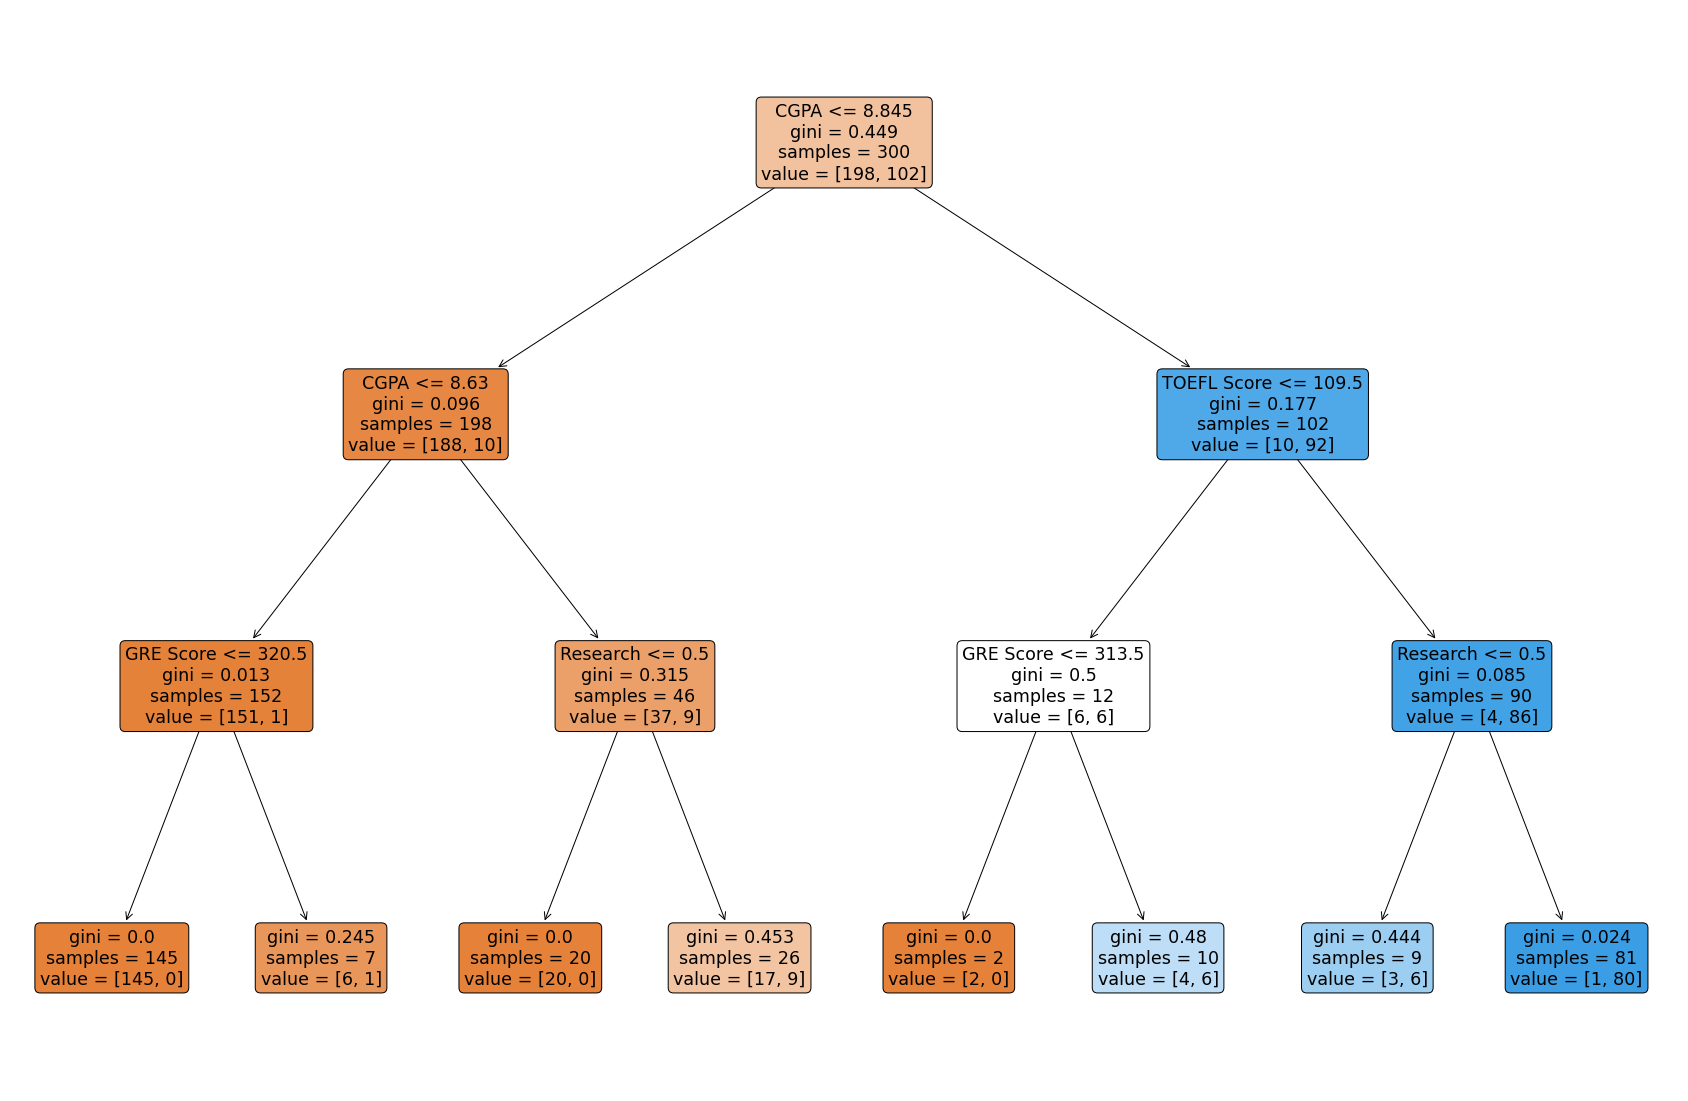

In [24]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))

tree.plot_tree(clf,feature_names = feature_cols,filled = True,rounded = True)
plt.savefig('admission_report.png')